### Copyright (C) 2020 Sobhan Moradiyan Daghigh - All Rights Reserved

## Data Mining UniProj - no.3
#### 1/8/2021

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder

### Reading dataset

In [2]:
quality = pd.read_excel('dataset/keifiat.xlsx')
orders = pd.read_csv('dataset/tarikhche kharid.csv')

In [3]:
quality = quality.filter(['product_id', 'product_title', 'recommend'])
quality.head()

,product_id,product_title,recommend
0,3692,ماوس بی‌سیم لاجیتک مدل M325,\N
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea


In [4]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_id     100000 non-null  int64 
 1   product_title  100000 non-null  object
 2   recommend      100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [5]:
groups = quality.groupby(by=['product_id'])
groups.first()

,product_title,recommend
product_id,,
300,پرینتر لیزری اچ پی مدل LaserJet P2035,\N
310,اچ پی لیزر جت پی 2055 دی,\N
352,گوشی موبایل نوکیا 5800 نویگیشن ادیشن,\N
363,گوشی موبایل نوکیا 6303 کلاسیک,\N
423,لپ تاپ ایسر اسپایر 5738 زد جی,\N
...,...,...
907669,چراغ دیواری مجیک لایت مدل WGBT,\N
908646,کتابخانه اوشن تجارت طرح S شکل کد 160cm,\N
908760,اسپری مردانه فیکورس مدل AVENTOUS,\N


In [6]:
quality['recommend'].value_counts()

recommended        36972
\N                 36382
not_recommended    16110
no_idea            10536
Name: recommend, dtype: int64

In [7]:
for grp, pdf in groups:
    List = quality.loc[(quality['product_id'] == grp) & (quality['recommend'] != '\\N')]['recommend'].tolist()
    if List:
        most_frequent = max(set(List), key = List.count)
        quality.loc[(quality['product_id'] == grp) & (quality['recommend'] == '\\N'), ['recommend']] = most_frequent

In [8]:
quality.to_csv('preprocessed_quality.csv', index=False, encoding='utf-8-sig')

In [6]:
quality = pd.read_csv('preprocessed_quality.csv')
quality.head()

,product_id,product_title,recommend
0,3692,ماوس بی‌سیم لاجیتک مدل M325,recommended
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea


In [7]:
quality['recommend'].value_counts()

recommended        48819
not_recommended    19198
\N                 18717
no_idea            13266
Name: recommend, dtype: int64

In [8]:
quality = quality[quality['recommend'] != '\\N']
quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81283 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     81283 non-null  int64 
 1   product_title  81283 non-null  object
 2   recommend      81283 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [9]:
quality['recommend'].value_counts()

recommended        48819
not_recommended    19198
no_idea            13266
Name: recommend, dtype: int64

In [10]:
dummy = pd.get_dummies(quality['recommend'])
dummy.head()

,no_idea,not_recommended,recommended
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [12]:
quality['no_idea'] = dummy.iloc[:, 0]
quality['not_recommended'] = dummy.iloc[:, 1]
quality['recommended'] = dummy.iloc[:, 2]
quality.head()

,product_id,product_title,recommend,no_idea,not_recommended,recommended
0,3692,ماوس بی‌سیم لاجیتک مدل M325,recommended,0,0,1
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,recommended,0,0,1
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,not_recommended,0,1,0
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,no_idea,1,0,0
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,no_idea,1,0,0


In [13]:
rec_sum = quality.groupby(by=['product_id'], as_index=False).sum()
rec_sum.head()

,product_id,no_idea,not_recommended,recommended
0,1336,1,0,2
1,1482,0,0,5
2,1540,0,1,0
3,2535,0,0,1
4,2739,0,0,2


In [15]:
quality = quality.filter(['product_id', 'product_title'])
quality = quality.drop_duplicates(subset='product_id', keep='first')
quality.head()

,product_id,product_title
0,3692,ماوس بی‌سیم لاجیتک مدل M325
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...


In [17]:
quality = pd.merge(quality, rec_sum, on='product_id')
quality.head()

,product_id,product_title,no_idea,not_recommended,recommended
0,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,0,1,5
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,3,0,1
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,1,2,11


In [22]:
X = normalize(quality.iloc[:, 2:])
X

array([[0.        , 0.        , 1.        ],
       [0.        , 0.19611614, 0.98058068],
       [0.        , 1.        , 0.        ],
       ...,
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ]])

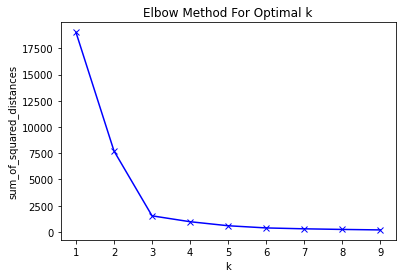

In [257]:
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=50)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [259]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=50)
model.fit(X)
labels=model.labels_

quality['cluster'] = labels
quality.head()

,product_id,product_title,no_idea,not_recommended,recommended,cluster
0,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2,2
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,0,1,5,2
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0,1
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,3,0,1,0
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,1,2,11,2


In [267]:
groups = quality.groupby(by=['cluster'])
groups.first()

,product_id,product_title,no_idea,not_recommended,recommended
cluster,,,,,
0,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,3,0,1
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,0,1,0
2,3692,ماوس بی‌سیم لاجیتک مدل M325,0,0,2


In [280]:
for grp, pdf in groups:
    print("\n\ncluster: ", grp, "    product counts: ", len(pdf))
    print(pd.DataFrame(pdf['product_title'].tolist()).iloc[:5,])



cluster:  0     product counts:  6750
                                                   0
0   گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت
1     فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر
2                             هدفون کریتیو مدل MA200
3  گوشی موبایل تی پی-لینک مدل Neffos C5 Max TP702...
4                    جعبه نظم دهنده صندوق خودرو تاشو


cluster:  1     product counts:  9102
                                                   0
0              یدک پولیشر میکروفایبر مهسان مدل 20119
1  ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی ...
2        گوشی موبایل ال جی مدل V10 ظرفیت 32 گیگابایت
3                          هدفون شیائومی مدل Quantie
4                           هدست واقعیت مجازی کوییلو


cluster:  2     product counts:  19609
                                                   0
0                        ماوس بی‌سیم لاجیتک مدل M325
1  شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...
2  شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...
3               لپ تاپ 15 اینچی

In [29]:
quality.iloc[10:20,]

,product_id,product_title,no_idea,not_recommended,recommended
10,156041,شمع خودرو ان جی کی مدل BKR6EGP,2,1,9
11,134367,ماشین بازی بیبی لند مدل Top Car,0,0,1
12,114006,شارژر همراه لنوو با ظرفیت 10400 میلی آمپر ساعت,0,0,1
13,146879,فلاسک غذا خودرو بلک اند دکر مدل BDV212F,0,0,1
14,90894,مچ‌ بند هوشمند آی واون مدل i5 Plus,2,5,18
15,21340,ماشین اصلاح صورت پاناسونیک سری Lamdash مدل ES-...,1,1,29
16,144139,هدفون کریتیو مدل MA200,1,1,0
17,105719,ادو تویلت مردانه دیور مدل Sauvage حجم 100 میلی...,0,0,4
18,147165,روغن موتور خودرو توتال مدل Quartz 7000 حجم 4 لیتر,1,1,16
19,116387,اسپیکر هترون مدل HSP260,0,0,1


In [40]:
data_segmented = normalize(quality.iloc[:30, 2:])
data_segmented

array([[0.        , 0.        , 1.        ],
       [0.        , 0.19611614, 0.98058068],
       [0.        , 1.        , 0.        ],
       [0.9486833 , 0.        , 0.31622777],
       [0.08908708, 0.17817416, 0.97995789],
       [0.        , 0.        , 1.        ],
       [0.24253563, 0.        , 0.9701425 ],
       [0.        , 0.9701425 , 0.24253563],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.21566555, 0.10783277, 0.97049496],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.10644926, 0.26612315, 0.95804333],
       [0.03444183, 0.03444183, 0.99881306],
       [0.70710678, 0.70710678, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.06225728, 0.06225728, 0.99611649],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

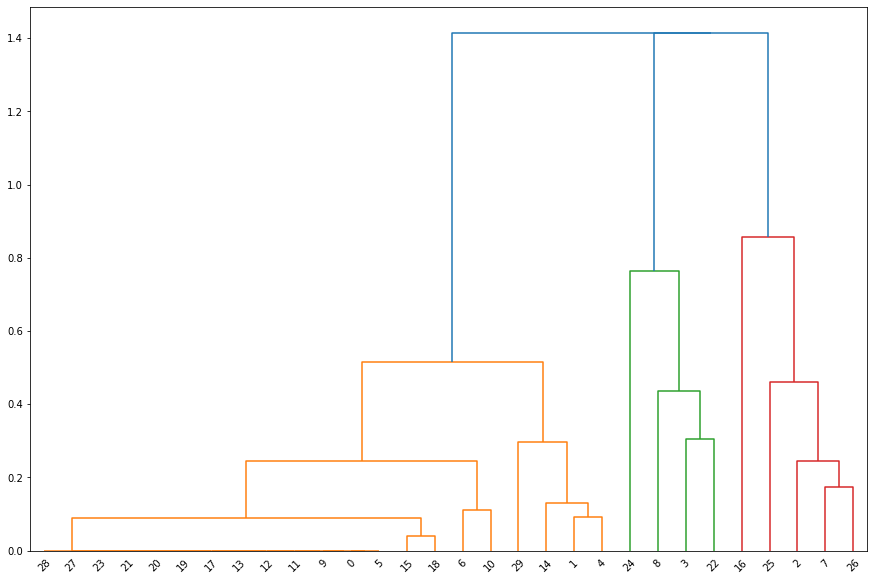

In [48]:
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(data_segmented, method='complete'))